In [1]:
#%matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
#matplotlib.style.use('ggplot')

In [2]:
import os;
os.chdir("/Users/cesare.chung/Dropbox/2017ML/CHPT-NTHU/Working_Directory_/Rcode/AU2/ENIG/")
print (os.getcwd())

/Users/cesare.chung/Dropbox/2017ML/CHPT-NTHU/Working_Directory_/Rcode/AU2/ENIG


In [3]:
df = pd.read_csv("ENIG.csv",encoding="latin-1")


In [4]:
df.drop(['WORK_TYPE'], axis=1, inplace=True)

df=df[['MACHINE_ID','EVENTDATETIME','END_TIME','IN_TIME','PART_NUMBER','LOTNO','QUANTITY','TARGET_NO','AREA','ERP_EFrontareaSQ',
       'ERP_EBackareaSQ','GOLD_TIME','AC_GOLD_TIME','PRESENT_DIPPING_12','PRESENT_DIPPING_13','PRESENT_DIPPING_21','PRESENT_DIPPING_22',
       'PRESENT_DIPPING_26','PRESENT_DIPPING_27','PRESENT_DIPPING_31','PRESENT_DIPPING_32','TEMPERATURE_12','TEMPERATURE_13',
       'TEMPERATURE_21','TEMPERATURE_22','TEMPERATURE_26','TEMPERATURE_27','TEMPERATURE_31','TEMPERATURE_32','HEATING_31','HEATING_32',
       'HEATING_21','HEATING_22','CONDUCTIVITY_20','CONDUCTIVITY_23','CONDUCTIVITY_25','CONDUCTIVITY_30','CONDUCTIVITY_35',
       'ERP_EAuThick','AUTHICK_01','AUTHICK_02','AUTHICK_03','AUTHICK_04','AUTHICK_05']]

In [5]:
#
def NAFUN (xx):
 if xx == 0:
    return('nan')
 else:
     return(xx)
#     


In [6]:
df2=pd.DataFrame({'New_AUTHICK_01':df['AUTHICK_01'].apply(NAFUN),'New_AUTHICK_02':df['AUTHICK_02'].apply(NAFUN),'New_AUTHICK_03':df['AUTHICK_03'].apply(NAFUN),
                  'New_AUTHICK_04':df['AUTHICK_04'].apply(NAFUN),'New_AUTHICK_05':df['AUTHICK_05'].apply(NAFUN)})

In [7]:
#
df = pd.merge(df, df2, left_index = True, right_index = True)
#
#df.dtypes

In [8]:
#df.head()


In [9]:
#
AUT = ['New_AUTHICK_01','New_AUTHICK_02','New_AUTHICK_03','New_AUTHICK_04','New_AUTHICK_05']

for i in AUT:
    df[i]=df[i].astype('float64')


In [10]:
#
df['AuThick_Average']=df[['New_AUTHICK_01','New_AUTHICK_02','New_AUTHICK_03','New_AUTHICK_04','New_AUTHICK_05']].mean(axis=1)


In [11]:
# REMOVE NA
df = df[df.AuThick_Average.notnull()]
#
df['AuThick_Average'].describe()
df.drop(['AUTHICK_01','AUTHICK_02','AUTHICK_03','AUTHICK_04','AUTHICK_05'], axis=1, inplace=True)


In [12]:
#df.head()


In [13]:
############################################################# MES
#TIME
df['TIME1213'] = df[['PRESENT_DIPPING_12','PRESENT_DIPPING_13']].sum(axis=1)
df['TIME2122'] = df[['PRESENT_DIPPING_21','PRESENT_DIPPING_22']].sum(axis=1)
df['TIME2627'] = df[['PRESENT_DIPPING_26','PRESENT_DIPPING_27']].sum(axis=1)
df['TIME3132'] = df[['PRESENT_DIPPING_31','PRESENT_DIPPING_32']].sum(axis=1)   #0
#TEMPERATURE
df['TEMPERATURE1213'] = df[['TEMPERATURE_12','TEMPERATURE_13']].sum(axis=1)
df['TEMPERATURE2122'] = df[['TEMPERATURE_21','TEMPERATURE_22']].sum(axis=1)
df['TEMPERATURE2627'] = df[['TEMPERATURE_26','TEMPERATURE_27']].sum(axis=1)
df['TEMPERATURE3132'] = df[['TEMPERATURE_31','TEMPERATURE_32']].sum(axis=1)    #86.8

df['HEATING2122'] = df[['HEATING_21','HEATING_22']].sum(axis=1)
df['HEATING3132'] = df[['HEATING_31','HEATING_32']].sum(axis=1)


In [14]:
#Neglect data TIME3132 < 600
df=df[df['TIME3132']>600]


In [15]:
df[['TEMPERATURE_31','TEMPERATURE_32']][(df.TEMPERATURE_31>0)&(df.TEMPERATURE_32>0)]
df[['TEMPERATURE_31','TEMPERATURE_32']].head()

,TEMPERATURE_31,TEMPERATURE_32
0,0.0,51.1
1,0.0,51.2
3,0.0,51.2
5,0.0,51.1
6,0.0,51.1


In [16]:
#
############################################################# MES
# VOLUMN # inch^3 ==> cm^3
df['VOLAPP'] = df['AuThick_Average'] * df['AREA'] 
#df.loc[:, 'VOLAPP'] *= pow(2.54,3) * pow(10,-6)    ## cm^3
df['VOLAPP'] = df['VOLAPP'].apply(lambda x: x*pow(2.54,3) * pow(10,-6))   ## cm^3
df['VOLAPP'].describe()


count    399.000000
mean       0.079227
std        0.072290
min        0.000000
25%        0.026962
50%        0.053153
75%        0.106915
max        0.439027
Name: VOLAPP, dtype: float64

In [17]:
############################################################# Pre-Analysis - 1
# Calculate Variance and Range
df_=df[['New_AUTHICK_01','New_AUTHICK_02','New_AUTHICK_03','New_AUTHICK_04','New_AUTHICK_05','PART_NUMBER','LOTNO']]

# Calculate variance by LOT
df_['AU_var'] = df_.ix[:,0:5].var(axis=1)
df_['AU_var2'] = df_[['New_AUTHICK_01','New_AUTHICK_02','New_AUTHICK_03','New_AUTHICK_04','New_AUTHICK_05']].var(axis=1)

df_['NEW_max'] = df_.ix[:,0:5].max(axis=1)
df_['NEW_min'] = df_.ix[:,0:5].min(axis=1)

#Create a new function:
def NEW_range (x):
  return x.max() - x.min()

df_['range'] = df_.ix[:,0:5].apply(NEW_range, axis=1)


/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaco

In [18]:
#############################################################
df_['AU_var'] / df_['AU_var2']

df = pd.concat([df,df_.ix[:,7:12]], axis=1)
df.drop(['AU_var2'], axis=1, inplace=True)

df.AU_var.describe()
df.NEW_max.describe()
df.NEW_min.describe()
df.range.describe()
#

df.range.argmax()
df.range.argmin()
df.range.idxmax()
df.range.idxmin()
df.index

df.range.quantile()


0.6303100000000015

In [20]:
############################################################# Pre-Analysis - 2
df['AU_var'].corr(df['range'],method='pearson')
df['AuThick_Average'].corr(df['TIME3132'],method='pearson')
df['AuThick_Average'].corr(df['AC_GOLD_TIME'],method='pearson')

df.apply(lambda x: sum(x.isnull()),axis=0) 


MACHINE_ID             0
EVENTDATETIME          0
END_TIME               0
IN_TIME                0
PART_NUMBER            0
LOTNO                  0
QUANTITY               0
TARGET_NO              0
AREA                   0
ERP_EFrontareaSQ       0
ERP_EBackareaSQ        0
GOLD_TIME              0
AC_GOLD_TIME           0
PRESENT_DIPPING_12     0
PRESENT_DIPPING_13     0
PRESENT_DIPPING_21     0
PRESENT_DIPPING_22     0
PRESENT_DIPPING_26     0
PRESENT_DIPPING_27     0
PRESENT_DIPPING_31     0
PRESENT_DIPPING_32     0
TEMPERATURE_12         0
TEMPERATURE_13         0
TEMPERATURE_21         0
TEMPERATURE_22         0
TEMPERATURE_26         0
TEMPERATURE_27         0
TEMPERATURE_31         0
TEMPERATURE_32         0
HEATING_31             0
HEATING_32             0
HEATING_21             0
HEATING_22             0
CONDUCTIVITY_20        0
CONDUCTIVITY_23        0
CONDUCTIVITY_25        0
CONDUCTIVITY_30        0
CONDUCTIVITY_35        0
ERP_EAuThick           0
New_AUTHICK_01         0


In [21]:
##FILTERING Records
df[(df['AC_GOLD_TIME']>3000)&(df['ERP_EAuThick']==30)]
df[(df.AC_GOLD_TIME>3000)&(df.ERP_EAuThick==30)]
##FILTERING Records
df[:45]
df[2:40]
df.head(10)
df.describe()
df.dtypes
df.columns
len(df)
df.shape


(399, 60)

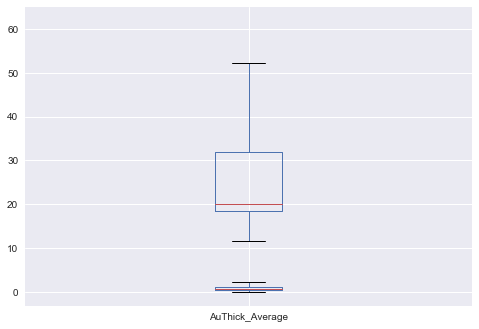

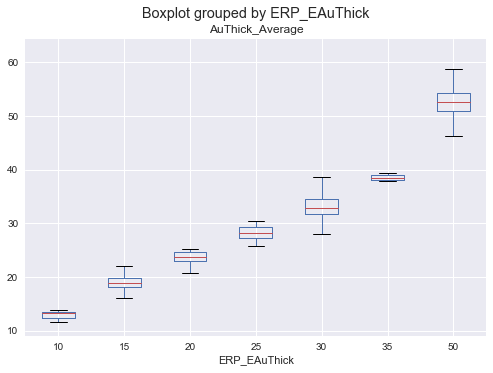

In [22]:
df.boxplot(column='range')
df.boxplot(column='AuThick_Average')
df.boxplot(column='AuThick_Average', by = 'ERP_EAuThick')


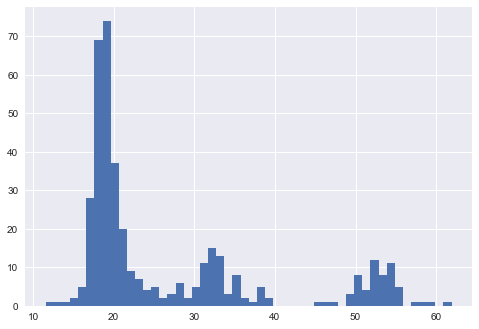

In [23]:
df['QUANTITY'].unique()
df['QUANTITY'].value_counts()
df['ERP_EAuThick'].value_counts()
#df['range'].hist(bins=50)
df['AuThick_Average'].hist(bins=50)


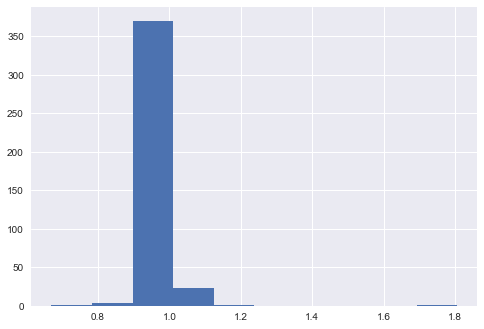

In [24]:
#
hh=df['TIME3132'] / df['AC_GOLD_TIME']
hh[hh !=0].describe()
hh.describe()
hh.hist(bins=10)
#


In [25]:
#
df['ERP_EAuThick'].value_counts()

15    244
30     61
50     58
20     16
25     14
35      3
10      3
Name: ERP_EAuThick, dtype: int64

In [26]:
#
def PEAK (xx):
    if xx in [10,15,20]:        
       return('PEAK1')       
    else:
       if xx in [25,30,35]:
          return('PEAK2')       
       else:
          return('PEAK3')


In [27]:
df2 = pd.DataFrame({'New_ERP_EAuThick':df['ERP_EAuThick'].apply(PEAK)})
df =  pd.merge(df, df2, left_index = True, right_index = True)
df['New_ERP_EAuThick'].value_counts()


PEAK1    263
PEAK2     78
PEAK3     58
Name: New_ERP_EAuThick, dtype: int64

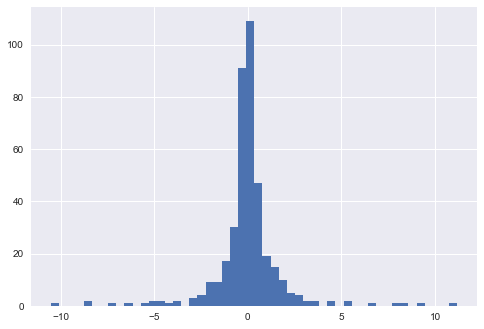

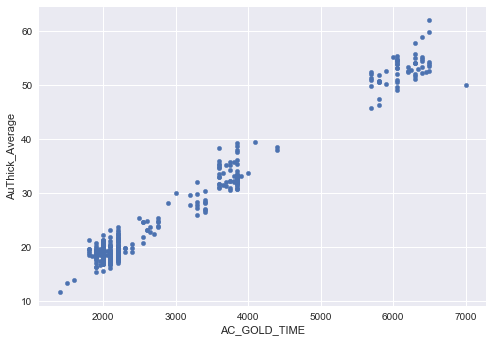

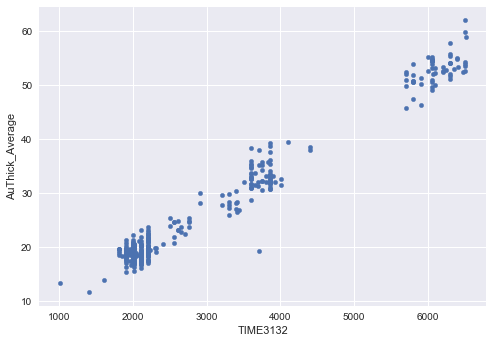

In [28]:
df['range'].diff().hist(bins=50)
df.plot.scatter(x='AC_GOLD_TIME', y='AuThick_Average');
df.plot.scatter(x='TIME3132', y='AuThick_Average');


ERP_EAuThick
10    Axes(0.125,0.125;0.775x0.755)
15    Axes(0.125,0.125;0.775x0.755)
20    Axes(0.125,0.125;0.775x0.755)
25    Axes(0.125,0.125;0.775x0.755)
30    Axes(0.125,0.125;0.775x0.755)
35    Axes(0.125,0.125;0.775x0.755)
50    Axes(0.125,0.125;0.775x0.755)
Name: AuThick_Average, dtype: object

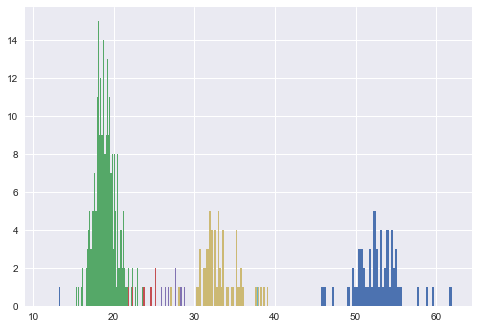

In [29]:
#
h = df.groupby(['ERP_EAuThick'])
h['AuThick_Average'].hist(bins=60)
#h['AC_GOLD_TIME'].hist(bins=5)
#h['TIME3132'].hist(bins=10)
#


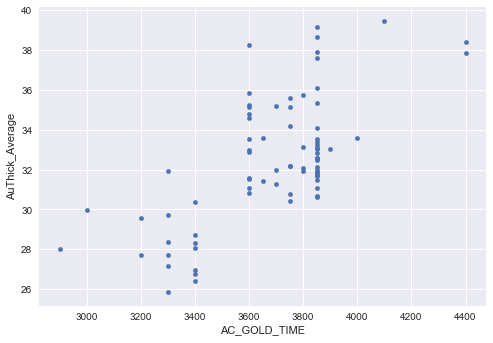

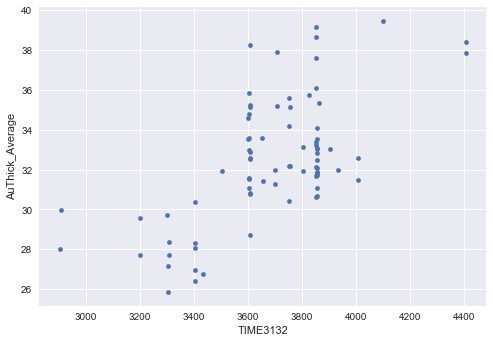

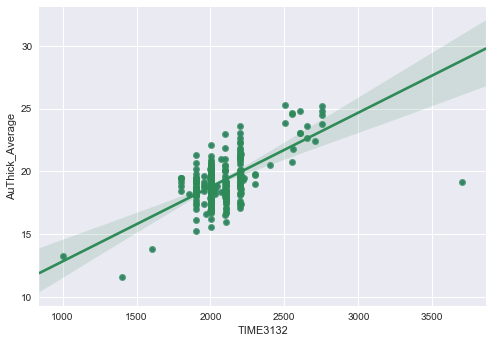

In [30]:
df[df.New_ERP_EAuThick =='PEAK2'].plot.scatter(x='AC_GOLD_TIME', y='AuThick_Average');
df[df.New_ERP_EAuThick =='PEAK2'].plot.scatter(x='TIME3132', y='AuThick_Average');

df[(df.TIME3132>=250) &(df.New_ERP_EAuThick =='PEAK1')].plot.scatter(x='TIME3132', y='AuThick_Average');

#
sns.regplot("TIME3132","AuThick_Average",data=df[df.New_ERP_EAuThick=='PEAK1'],robust=True, ci=95, color="seagreen")
sns.despine()


In [31]:
############################################################# Aggregate
g = df.groupby(['ERP_EAuThick'])
g['AuThick_Average'].var()
##
df.groupby(['QUANTITY','ERP_EAuThick']).mean()

grpagg = df.groupby('ERP_EAuThick').aggregate(np.mean)
grpagg

#grpsum = df.groupby('ERP_EAuThick').aggregate(np.sum)
#grpsum

,QUANTITY,TARGET_NO,AREA,ERP_EFrontareaSQ,ERP_EBackareaSQ,GOLD_TIME,AC_GOLD_TIME,PRESENT_DIPPING_12,PRESENT_DIPPING_13,PRESENT_DIPPING_21,...,TEMPERATURE2122,TEMPERATURE2627,TEMPERATURE3132,HEATING2122,HEATING3132,VOLAPP,AU_var,NEW_max,NEW_min,range
ERP_EAuThick,,,,,,,,,,,,,,,,,,,,,
10,2.000000,1.666667,407.000000,101.512333,101.914333,480.0,1500.000000,14.333333,0.000000,800.666667,...,52.100000,56.700000,50.666667,53.900000,54.533333,0.082010,0.181294,13.351630,12.470503,0.881127
15,1.659836,1.053279,167.745902,45.709533,62.854594,480.0,2046.721311,7.459016,11.155738,1182.159836,...,77.080738,84.378689,50.827869,79.795902,54.678279,0.051430,0.187438,19.360374,18.593630,0.766744
20,1.875000,1.000000,157.937500,35.107125,42.588687,480.0,2640.625000,13.375000,7.500000,942.500000,...,77.256250,84.837500,50.937500,80.031250,54.675000,0.060345,0.115606,24.029347,23.277394,0.751953
25,1.785714,1.071429,126.214286,37.301643,40.841143,480.0,3271.428571,17.071429,4.928571,701.000000,...,77.942857,84.464286,50.928571,80.721429,54.657143,0.057767,0.172275,28.598293,27.696069,0.902224
30,1.688525,1.065574,221.081967,66.918148,75.233967,480.0,3747.540984,9.000000,10.573770,1242.704918,...,77.465574,84.778689,50.927869,80.270492,54.701639,0.120333,0.577118,33.674687,32.566530,1.108158
35,1.333333,1.000000,121.333333,43.632000,43.378000,480.0,4300.000000,0.000000,17.666667,2402.333333,...,76.766667,84.800000,50.933333,79.266667,54.466667,0.076366,0.858346,39.607417,37.458853,2.148563
50,1.172414,1.051724,187.500000,77.666879,81.053328,480.0,6138.793103,6.086207,11.862069,1022.051724,...,77.251724,84.305172,50.968966,80.089655,54.625862,0.163326,2.140365,54.066924,51.472311,2.594613


In [32]:
############################################################# Subset
from pandas import DataFrame

df2 = pd.DataFrame(data = df, columns = ['AC_GOLD_TIME','AuThick_Average','ERP_EAuThick','New_AUTHICK_02','New_AUTHICK_04'])
df2.dtypes


AC_GOLD_TIME         int64
AuThick_Average    float64
ERP_EAuThick         int64
New_AUTHICK_02     float64
New_AUTHICK_04     float64
dtype: object

In [33]:
df2.query('New_AUTHICK_02 >= New_AUTHICK_04')
df2[df2.New_AUTHICK_02 >= df2.New_AUTHICK_04]
df2.loc[df2.New_AUTHICK_02 >= df2.New_AUTHICK_04]
df2[df2.ERP_EAuThick ==20].head()

,AC_GOLD_TIME,AuThick_Average,ERP_EAuThick,New_AUTHICK_02,New_AUTHICK_04
75,2750,25.233568,20,25.12465,25.40288
76,2750,23.816776,20,23.96066,23.95850
91,2550,24.660304,20,24.89762,24.98803
105,2500,25.244272,20,24.97639,25.60806
244,2750,24.772354,20,24.66195,24.79846


In [34]:
df[["PART_NUMBER","LOTNO","QUANTITY","range"]][(df.PART_NUMBER=="TSMC-DD007A")&(df.range>=0.6)]
df[["PART_NUMBER","LOTNO","QUANTITY","range"]][(df.PART_NUMBER=="TSMC-DD007A")&(df.QUANTITY==2)]

df[df['New_ERP_EAuThick']=='PEAK1']['AuThick_Average']
df[df['New_ERP_EAuThick']=='PEAK2']['AuThick_Average']

df[df['New_ERP_EAuThick']=='PEAK1'][['AuThick_Average','TIME3132']].head()

,AuThick_Average,TIME3132
0,20.958046,2101
1,21.539106,2201
5,23.053732,2202
6,20.961532,2202
7,21.112462,2202


In [35]:
#
df['TIME3132'].describe()
#Check missing values in the dataset
sum(df['range'].isnull()) 

sum(df['AU_var'].isnull()) 
df['AU_var'].dropna().describe()

df[['TIME3132','PART_NUMBER','LOTNO','TIME2122','TIME2627','TEMPERATURE3132','HEATING2122','HEATING3132']][df.TIME3132 >= 3000]
df[['AU_var','NEW_max','NEW_min','range','ERP_EAuThick']][df.range >= 7]


,AU_var,NEW_max,NEW_min,range,ERP_EAuThick
103,12.846926,53.91068,44.93234,8.97834,50
226,17.316489,53.84276,42.66556,11.17720,50
253,13.351312,57.43798,48.14844,9.28954,50
274,15.746547,35.77117,25.17077,10.60040,30
315,13.095865,60.56390,52.16764,8.39626,50
531,7.171082,51.89239,44.85119,7.04120,50
556,10.924444,57.96216,49.42482,8.53734,50


In [36]:
#
df['G_NG'] = 'G'
df.G_NG[df.New_AUTHICK_01 <= df.ERP_EAuThick] = 'NG'
df.G_NG[df.New_AUTHICK_02 <= df.ERP_EAuThick] = 'NG'
df.G_NG[df.New_AUTHICK_03 <= df.ERP_EAuThick] = 'NG'
df.G_NG[df.New_AUTHICK_04 <= df.ERP_EAuThick] = 'NG'
df.G_NG[df.New_AUTHICK_05 <= df.ERP_EAuThick] = 'NG'
df['G_NG'].value_counts()
df[['New_AUTHICK_01','New_AUTHICK_02','New_AUTHICK_03','New_AUTHICK_04','New_AUTHICK_05','ERP_EAuThick']][df.G_NG == 'NG'].head()
#

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda/e

,New_AUTHICK_01,New_AUTHICK_02,New_AUTHICK_03,New_AUTHICK_04,New_AUTHICK_05,ERP_EAuThick
90,50.17044,49.79344,50.86896,49.81123,50.11541,50
103,50.64745,44.93234,53.37122,49.79611,53.91068,50
109,51.31396,46.72974,49.56838,50.51305,50.21699,50
115,45.63928,45.72290,45.94615,45.59698,45.86181,50
158,45.90582,46.27489,46.24231,46.27098,46.48793,50


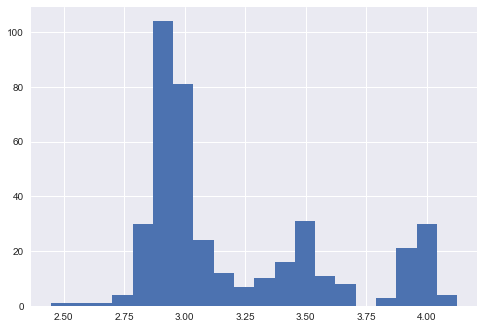

In [37]:
#
df[['EVENTDATETIME','END_TIME','New_AUTHICK_01','New_AUTHICK_02','New_AUTHICK_03','New_AUTHICK_04','New_AUTHICK_05','ERP_EAuThick']][df.New_AUTHICK_01<df.ERP_EAuThick]
#

#
df['AuThick_Average_log'] = np.log(df['AuThick_Average'])
df['AuThick_Average_log'].hist(bins=20)
